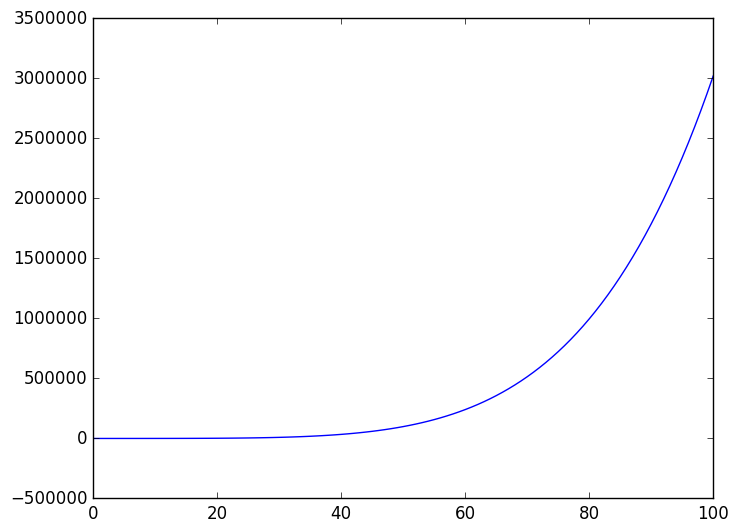

1-element Array{Int32,1}:
 1

In [1]:
using PyPlot

x = collect(0.0:1.0:100)
y = 2.0.*x.^2 - 100.0 + x +0.0003.*x.^5

plot(x,y)

ese = y./100

NN = length(y)
wx = 1. ./(ese.^2) # relative variance of observations
wy = zeros([1])+1. # systematic errors... not used so put them to 1
VAL = ese.^2

M = 2
N = length(x)
K = 1 # number of y columns
MD = 2 #spline mode
NC = length(y)

c = ones(NN,NC)
WK = ones(6*(N*M+1)+N,1)
IER=Int32[1]


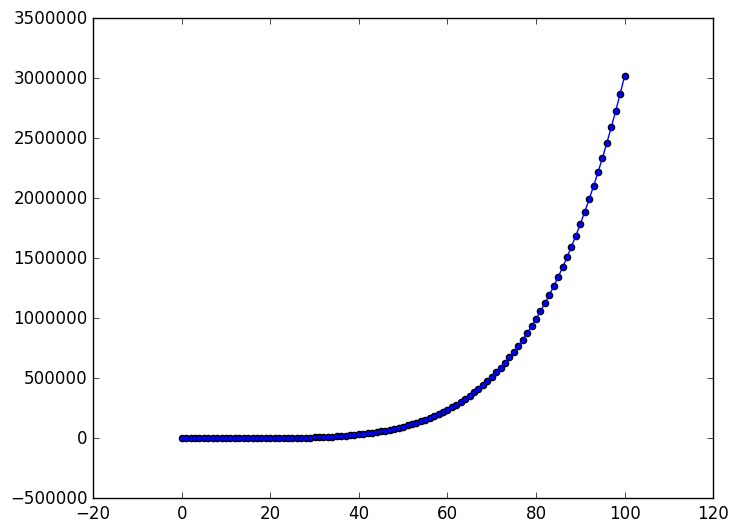

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32965c790>

In [16]:
#ccall( (:gcvspl_, "./libgcvspl.so"), Void, (Ptr{Float64},Ptr{Float64},Ptr{Cint},Ptr{Float64},Ptr{Float64},Ptr{Cint},Ptr{Cint},Ptr{Cint},Ptr{Cint},Ptr{Float64},Ptr{Float64},Ptr{Cint},Ptr{Float64},Ptr{Cint}),x,y,&NN,wx,wy,&M,&N,&K,&MD,VAL,c,&NC,WK,IER)
ccall( (:gcvspl_, "./libgcvspl.so"), Void, (Ptr{Float64},Ptr{Float64},Ptr{Cint},Ptr{Float64},Ptr{Float64},Ptr{Cint},Ptr{Cint},Ptr{Cint},Ptr{Cint},Ptr{Float64},Ref{Float64},Ptr{Cint},Ref{Float64},Ref{Cint}),x,y,&N,wx,wy,&M,&N,&K,&MD,VAL,c,&NC,WK,IER)
y_calc = zeros(size(x,1),1)
IDER = 0
l=1
q = zeros(2*M,1)
for i =1:size(y_calc,1)
    y_calc[i] = ccall( (:splder_, "./libgcvspl.so"), Float64, (Ptr{Cint},Ptr{Cint},Ptr{Cint},Ptr{Float64},Ptr{Float64},Ptr{Float64},Ptr{Cint},Ptr{Float64}),&IDER, &M, &N, &x[i], x, c, &l, q)
end
figure()
scatter(x,y)
plot(x,y_calc)


In [14]:
y_calc

101x1 Array{Float64,2}:
 -100.0      
  -96.9997   
  -89.9904   
  -78.9271   
  -63.6928   
  -44.0625   
  -19.6672   
   10.0421   
   45.8304   
   88.7147   
  140.0      
  201.315    
  274.65     
    ⋮        
    1.69105e6
    1.78766e6
    1.88865e6
    1.99416e6
    2.10436e6
    2.21938e6
    2.33939e6
    2.46455e6
    2.59502e6
    2.73097e6
    2.87257e6
    3.02e6   

In [3]:
c

Array{Float64,N}